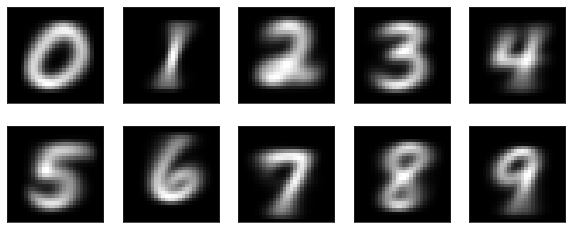

In [3]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset from Keras
(images, labels), _ = mnist.load_data()

# Normalize images from 28x28 to 784
images = (images.astype('float32') / 255.).reshape((len(images), np.prod(images.shape[1:])))

# Plot the mean of each character
plt.figure(figsize=(10, 4))
for digit in range(10):
    ax = plt.subplot(2, 5, digit + 1)
    mean_digit = images[labels == digit].mean(axis=0)
    plt.imshow(mean_digit.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.savefig('mean_digits.png', dpi=200)
plt.show()

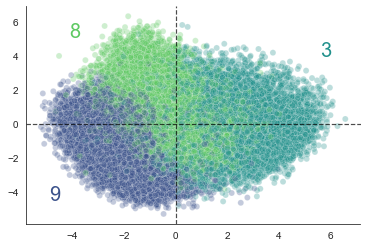

In [4]:
from sklearn.decomposition import PCA
import seaborn as sns

# Restrict the dataset to 3, 8, and 9
conditions = (labels == 3) | (labels == 8) | (labels == 9)
images = images[conditions]; labels = labels[conditions]

# Apply PCA to reduce the dimension to 2
pca_images = PCA(n_components=2).fit_transform(images)

# Plot the latent space colored by label
sns.set_style('white'); sns.set_palette('viridis', 3)
sns.scatterplot(x=pca_images.T[0], y=pca_images.T[1], hue=labels.astype('str'), alpha=0.3)

# Add labels to the plot
viridis = sns.color_palette('viridis', 3)
plt.text(-4.9, -4.5, '9', size=20, color=viridis[0])
plt.text(5.6, 4, '3', size=20, color=viridis[1])
plt.text(-4.1, 5.1, '8', size=20, color=viridis[2])
plt.legend().remove()

# Final adjustments to the plot
plt.axhline(c='k', ls='--', alpha=0.7, lw=1.2); plt.axvline(c='k', ls='--', alpha=0.7, lw=1.2)
sns.despine()
plt.savefig('and_or_gates.png', dpi=200); plt.show()